In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('../data/raw/telco_churn.csv')

In [65]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
df.shape

(7043, 21)

In [67]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [68]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [69]:
df.dropna(inplace=True)

In [70]:
df.shape

(7043, 21)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [72]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors='coerce')
df.dropna(inplace=True)
df['TotalCharges'].fillna(0,inplace=True)

In [73]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 109.9 KB


In [74]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [75]:
categorical_columns = ['gender','Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']


numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']


In [76]:
print("+++++++++++++++++VALUE COUNTS+++++++++++++++++")
for col in categorical_columns:
    print("="*40)
    print(df[col].value_counts())

+++++++++++++++++VALUE COUNTS+++++++++++++++++
gender
Male      3549
Female    3483
Name: count, dtype: int64
Partner
No     3639
Yes    3393
Name: count, dtype: int64
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64
DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64
TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: 

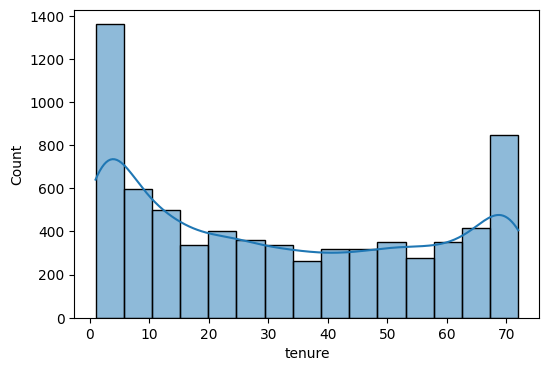

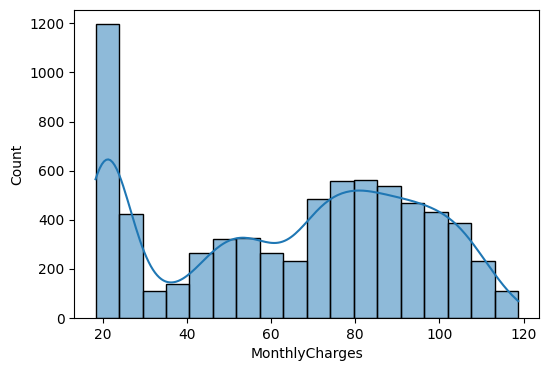

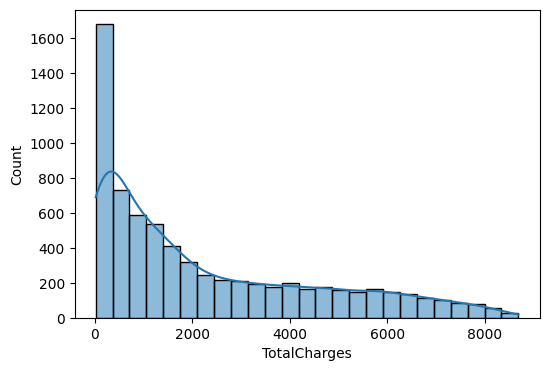

In [77]:
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col] ,kde=True)

In [78]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

In [79]:
df.groupby('Churn')[['tenure','MonthlyCharges','TotalCharges']].mean()

,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.650010,61.307408,2555.344141
Yes,17.979133,74.441332,1531.796094


In [80]:
def churn_rate(col):
    return df.groupby(col)['Churn'].apply(lambda x: (x=='Yes').mean()*100)

churn_rate('Contract')
churn_rate('InternetService')
churn_rate('PaymentMethod')

PaymentMethod
Bank transfer (automatic)    16.731518
Credit card (automatic)      15.253123
Electronic check             45.285412
Mailed check                 19.201995
Name: Churn, dtype: float64

In [81]:
df.drop('customerID', axis=1, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


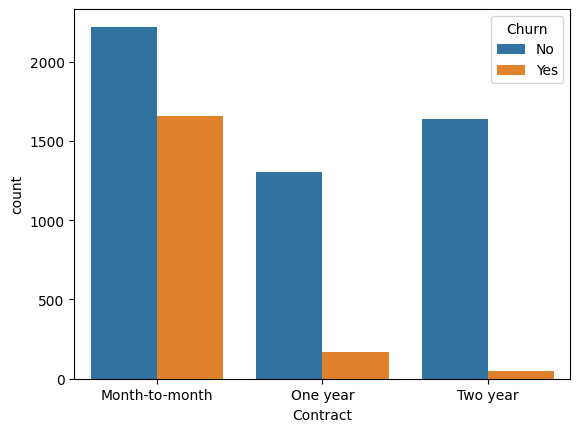

In [82]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.show()

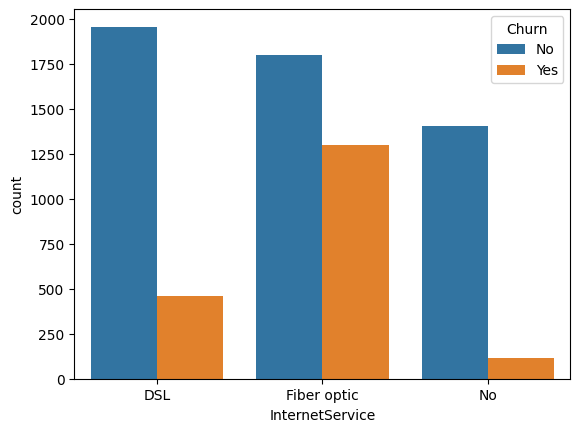

In [83]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.show()

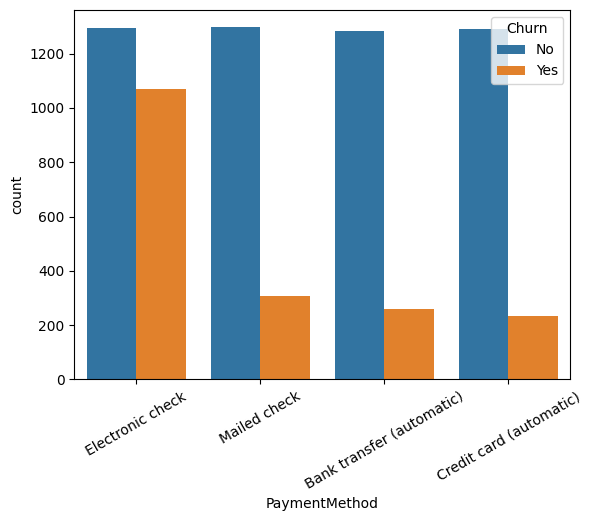

In [84]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=30)
plt.show()

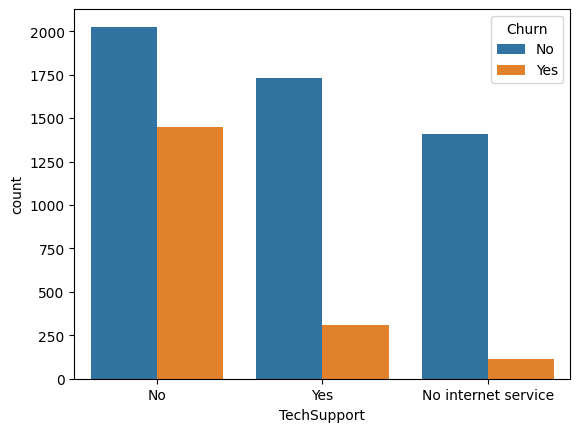

In [85]:
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.show()

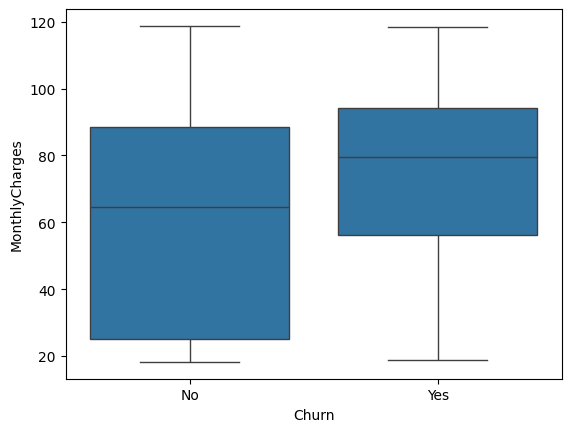

In [86]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.show()

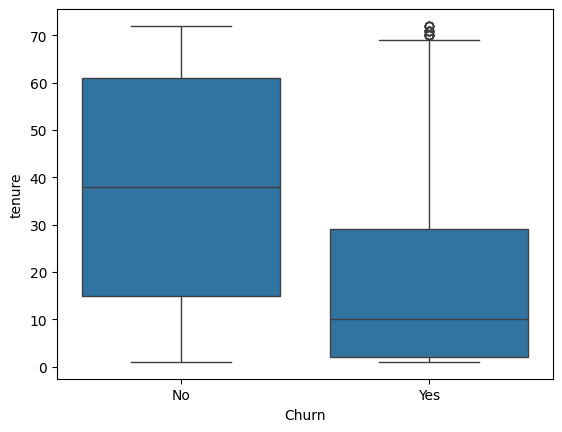

In [87]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.show()

In [88]:
df[['MonthlyCharges','TotalCharges']].quantile([0.01, 0.99])

,MonthlyCharges,TotalCharges
0.01,19.2000,19.900
0.99,114.7345,8039.883


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

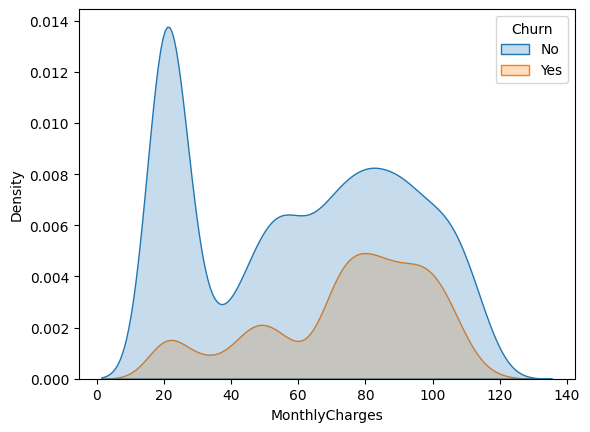

In [89]:
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True)

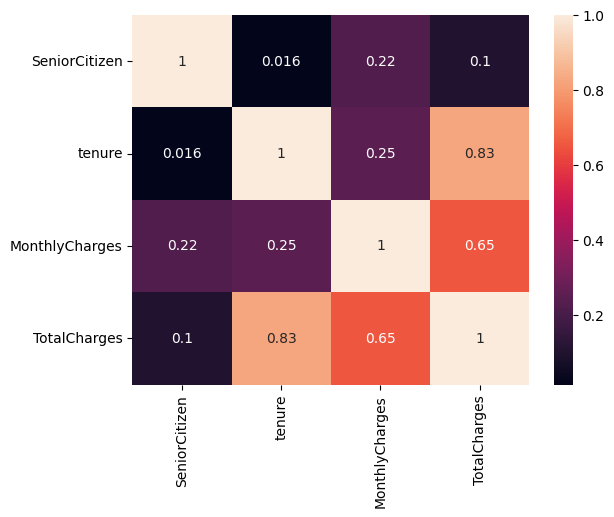

In [90]:
sns.heatmap(df.corr(numeric_only=True) , annot=True)
plt.show()

In [91]:
df.to_csv(
    '../data/processed/churn_cleaned.csv',
    index=False
)

## EDA Insights

- Customers with **month-to-month contracts** have the highest churn rate  
- **Low-tenure customers** are more likely to churn  
- **Higher monthly charges** increase churn probability  
- **Electronic check** users show higher churn than other payment methods  
- **Tenure and TotalCharges** are strongly correlated  
- Dataset shows **class imbalance** (73% No, 27% Yes)

